# Importing libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Loading Dataset

In [20]:
pkd_df = pd.read_csv("Parkinsson Disease.csv")

In [21]:
# printing the first 5 rows of the dataframe
pkd_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [22]:
# getting more information about the dataset
pkd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Checking null values

In [23]:
pkd_df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

checking unique values

In [24]:
pkd_df.apply(lambda x:len(x.unique()))

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

getting statistical values

In [25]:
pkd_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


# Exploratory Data Analysis

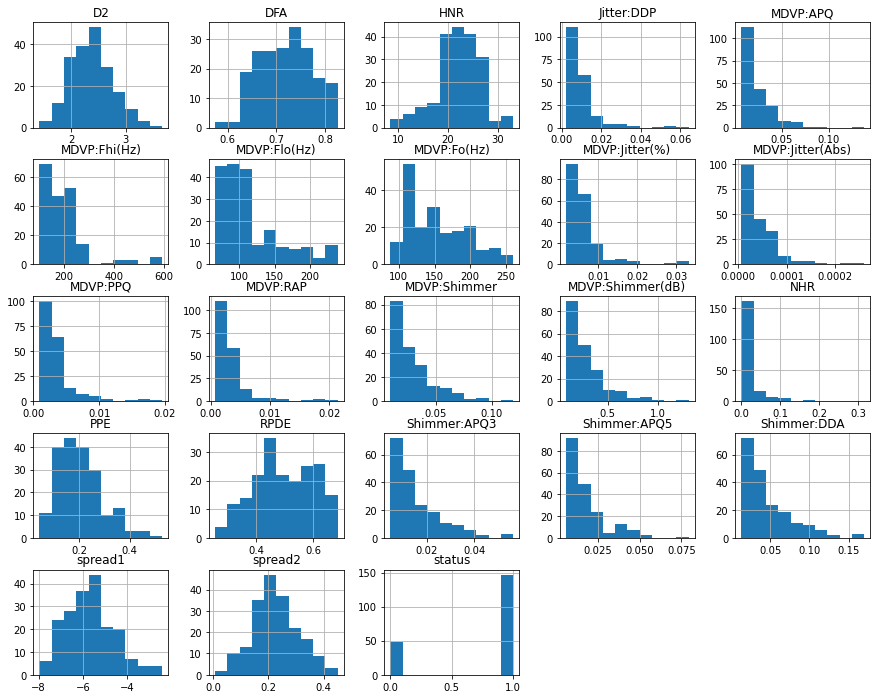

In [26]:
pkd_df.hist(figsize=(15,12))
plt.show()

In [27]:
# distribution of target Variable
pkd_df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [28]:
pkd_df['status'] = pkd_df.status.astype('float64')


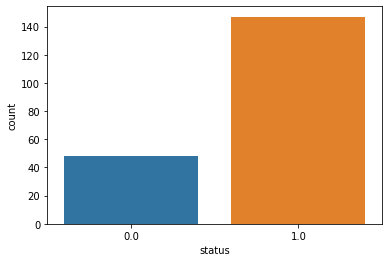

In [29]:
#for status
sns.countplot(pkd_df['status'])

getting correlation

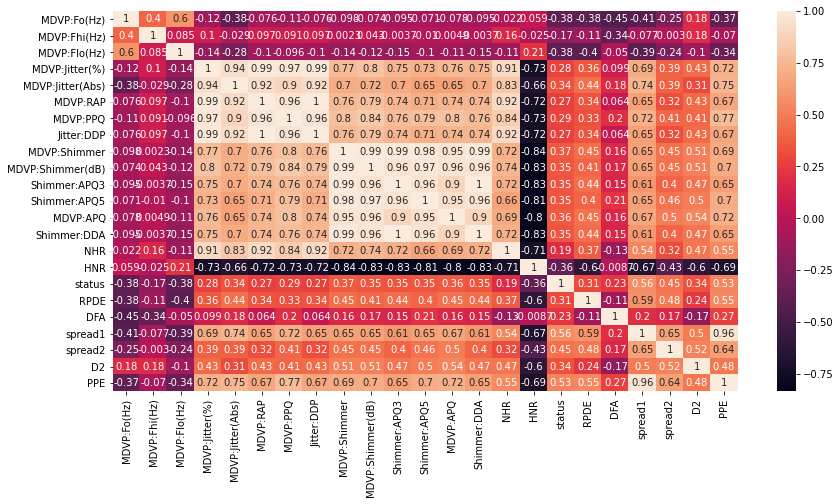

In [30]:
corr_matrix=pkd_df.corr()
corr_matrix
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [31]:
corr_status=pkd_df.corr()["status"].sort_values()
corr_status

MDVP:Fo(Hz)        -0.383535
MDVP:Flo(Hz)       -0.380200
HNR                -0.361515
MDVP:Fhi(Hz)       -0.166136
NHR                 0.189429
DFA                 0.231739
Jitter:DDP          0.266646
MDVP:RAP            0.266668
MDVP:Jitter(%)      0.278220
MDVP:PPQ            0.288698
RPDE                0.308567
MDVP:Jitter(Abs)    0.338653
D2                  0.340232
Shimmer:DDA         0.347608
Shimmer:APQ3        0.347617
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
MDVP:Shimmer        0.367430
spread2             0.454842
PPE                 0.531039
spread1             0.564838
status              1.000000
Name: status, dtype: float64

# Data Pre-Processing

Dropping Columns

In [32]:
pkd_df.drop(columns=['name','MDVP:Fo(Hz)','MDVP:Flo(Hz)','NHR','DFA','Jitter:DDP','MDVP:RAP','MDVP:Jitter(%)',
'RPDE','D2','Shimmer:DDA','MDVP:Shimmer(dB)','Shimmer:APQ5','MDVP:APQ','MDVP:Shimmer'],axis=1,inplace=True)

In [33]:
pkd_df.head()

,MDVP:Fhi(Hz),MDVP:Jitter(Abs),MDVP:PPQ,Shimmer:APQ3,HNR,status,spread1,spread2,PPE
0,157.302,0.00007,0.00554,0.02182,21.033,1.0,-4.813031,0.266482,0.284654
1,148.650,0.00008,0.00696,0.03134,19.085,1.0,-4.075192,0.335590,0.368674
2,131.111,0.00009,0.00781,0.02757,20.651,1.0,-4.443179,0.311173,0.332634
3,137.871,0.00009,0.00698,0.02924,20.644,1.0,-4.117501,0.334147,0.368975
4,141.781,0.00011,0.00908,0.03490,19.649,1.0,-3.747787,0.234513,0.410335


In [34]:
X =pkd_df[['MDVP:Fhi(Hz)','MDVP:Jitter(Abs)','MDVP:PPQ','Shimmer:APQ3','HNR','spread1','spread2','PPE']]
Y = pkd_df['status']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(146, 8)
(49, 8)
(146,)
(49,)


Feature Scalling

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Data Modelling

Logistic Regression

In [52]:
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred_log = model.predict(X_test)
accuracy = model.score(X_test, y_pred_log)
print(accuracy*100,'%')

100.0 %


DecisionTreeClassifier

In [39]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=10,random_state=0)
model=model.fit(X_train,Y_train)
y_pred_dec=model.predict(X_test)   # performance on test data
accuracy=metrics.accuracy_score(Y_test,y_pred_dec)

print(accuracy*100,'%')

85.71428571428571 %


In [40]:
cr=metrics.classification_report(Y_test,y_pred_dec)
print(cr)

              precision    recall  f1-score   support

         0.0       0.58      0.78      0.67         9
         1.0       0.95      0.88      0.91        40

    accuracy                           0.86        49
   macro avg       0.76      0.83      0.79        49
weighted avg       0.88      0.86      0.86        49



In [41]:
cm=metrics.confusion_matrix(Y_test,y_pred_dec)
print(cm)

[[ 7  2]
 [ 5 35]]


XGBClassifier

In [42]:
model=XGBClassifier()
model=model.fit(X_train,Y_train)
y_pred_xg=model.predict(X_test)
print(accuracy_score(Y_test, y_pred_xg)*100)

C:\Users\SSB\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
83.6734693877551


KNeighborsClassifier

In [43]:
model=KNeighborsClassifier(n_neighbors= 10, weights = 'distance')
model=model.fit(X_train,Y_train)
y_pred_KNN=model.predict(X_test)   # performance on test data
accuracy=metrics.accuracy_score(Y_test,y_pred_KNN)

print(accuracy*100,'%')

91.83673469387756 %


Support Vector Machine

In [44]:
model=SVC(kernel='rbf')
model=model.fit(X_train,Y_train)
y_pred_SVM=model.predict(X_test)   # performance on test data
accuracy=metrics.accuracy_score(Y_test,y_pred_SVM)

print(accuracy*100,'%')

85.71428571428571 %


RandomForestClassifier

In [45]:
model=RandomForestClassifier(n_estimators=5,criterion='entropy',max_depth=10,random_state=0)
model=model.fit(X_train,Y_train)
y_pred_ran=model.predict(X_test)   # performance on test data
accuracy=metrics.accuracy_score(Y_test,y_pred_ran)
print(accuracy*100,'%')


81.63265306122449 %


# Model Evaluation

Logistic Regression

In [46]:
print("Logistic Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_pred_log)))
print("R2 score:", r2_score(Y_test, y_pred_log))

Logistic Regression: 
RMSE: 0.5150787536377128
R2 score: -0.7694444444444439


In [47]:
print("Decision Tree Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_pred_dec)))
print("R2 score:", r2_score(Y_test, y_pred_dec))

Decision Tree Regression: 
RMSE: 0.3779644730092272
R2 score: 0.0472222222222225


In [48]:
print("XG Boost Regressor: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_pred_xg)))
print("R2 score:", r2_score(Y_test, y_pred_xg))

XG Boost Regressor: 
RMSE: 0.40406101782088427
R2 score: -0.08888888888888857


In [49]:
print("KNN Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_pred_KNN)))
print("R2 score:", r2_score(Y_test, y_pred_KNN))

KNN Regression: 
RMSE: 0.2857142857142857
R2 score: 0.4555555555555557


In [50]:
print("SVM: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_pred_SVM)))
print("R2 score:", r2_score(Y_test, y_pred_SVM))

SVM: 
RMSE: 0.3779644730092272
R2 score: 0.0472222222222225


In [51]:
print("Random Forest Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_pred_ran)))
print("R2 score:", r2_score(Y_test, y_pred_ran))

Random Forest Regression: 
RMSE: 0.4285714285714286
R2 score: -0.22499999999999964
